# Heart Disease prediction

## Introduction

The aim of this notebook is to predict heart diesease based on certain medical conditions of a person. Heart disease is very common in today's era. Having models that can predict this condition early on in a person can help with their treatment in the early stages and save lives. 
In addition to that, this notebook will help in determining the major factors playing a role in heart diseases and help identify the vulnerable population.



### Table of Contents

* Importing the dependencies
* Loading and preprocessing the data
* Univariant Analysis
* Scaling and normalizing the data
* Correlation matrix and further readings
* Models

## Importing the dependencies

In [2]:
!pip install numpy pandas matplotlib seaborn scikit-learn plotly opendatasets --quiet

In [4]:
import os      #loading the datasets
import matplotlib       #data visualization
import opendatasets as od      #importing the dataset
import numpy as np        #linear algebra
import pandas as pd       #dataframes and preprocessing
import matplotlib.pyplot as plt      #data visualization
import seaborn as sns               #data visualization
import plotly.express as px        #data visualization
%matplotlib inline               
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder, StandardScaler     #scaling and normalizing the data
from sklearn.model_selection import train_test_split               #splitting the data into training and testing

## Loading and preprocessing the data

In [5]:
dataset_url = 'https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  msheringandhi


Your Kaggle Key:

  ································


Dataset URL: https://www.kaggle.com/datasets/rashadrmammadov/heart-disease-prediction


100%|██████████| 15.9k/15.9k [00:00<00:00, 16.5MB/s]

In [6]:
os.listdir('heart-disease-prediction')              #obtaining the csv file
df = pd.read_csv('heart-disease-prediction/heart_disease_dataset.csv')         #loading dataset into dataframe

In [7]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [8]:
df.shape

(1000, 16)

In [9]:
df.isnull().sum()

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [11]:
df['Alcohol Intake'].value_counts()

Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64

It is observed that there are 340 null values in the 'Alcohol Intake' column. This indicates that 34% of the values are null. Since the percentage is fairly huge the rows cannot be deleted. We assume that the other values indicate light or no alcohol intake. Hence, we will fill the null values with light/none category for better analysis.

In [12]:
df.fillna('Light/none', inplace=True)
df.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

In [13]:
df.head(3)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Light/none,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1


In [14]:
# Let us check the age group of the dataset

df['Age'].describe()

count    1000.000000
mean       52.293000
std        15.727126
min        25.000000
25%        39.000000
50%        52.000000
75%        66.000000
max        79.000000
Name: Age, dtype: float64

The age group in this dataset is 25-79 which is a fairly diverse group and can help in a fair analysis.

## Univariant Analysis

Variable: Age
Mean: 52.293


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


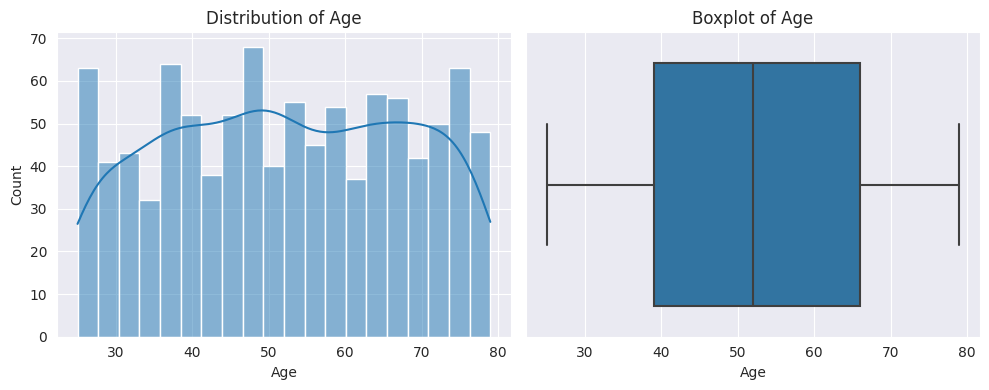

Variable: Cholesterol
Mean: 249.939


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


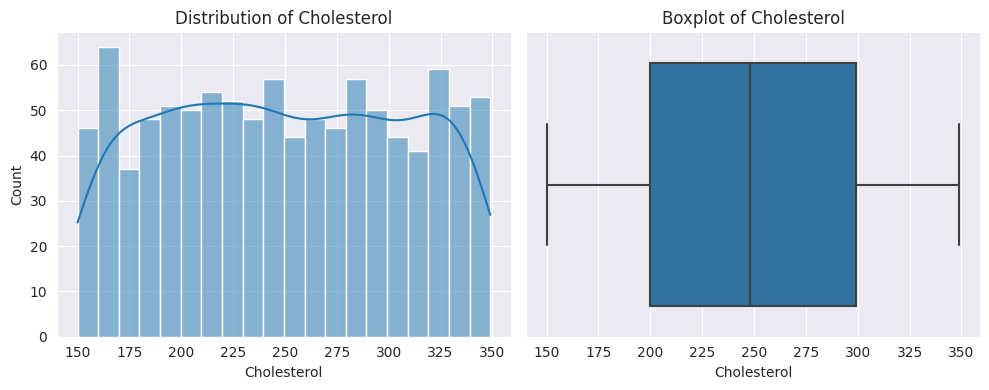

Variable: Blood Pressure
Mean: 135.281


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


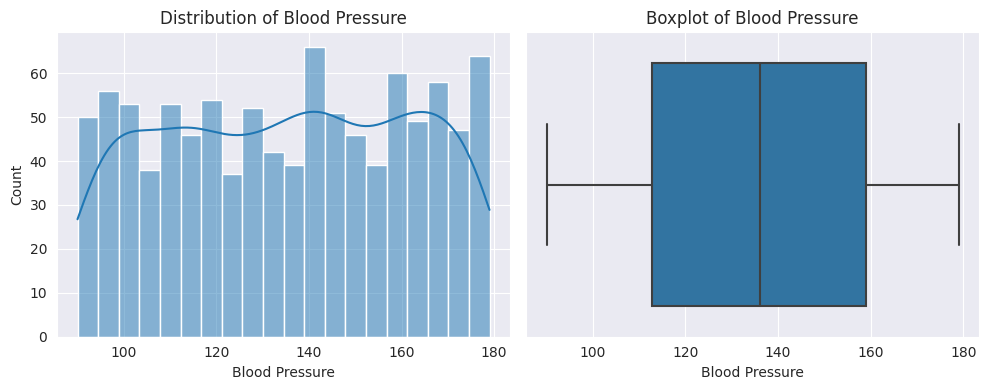

Variable: Heart Rate
Mean: 79.204


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


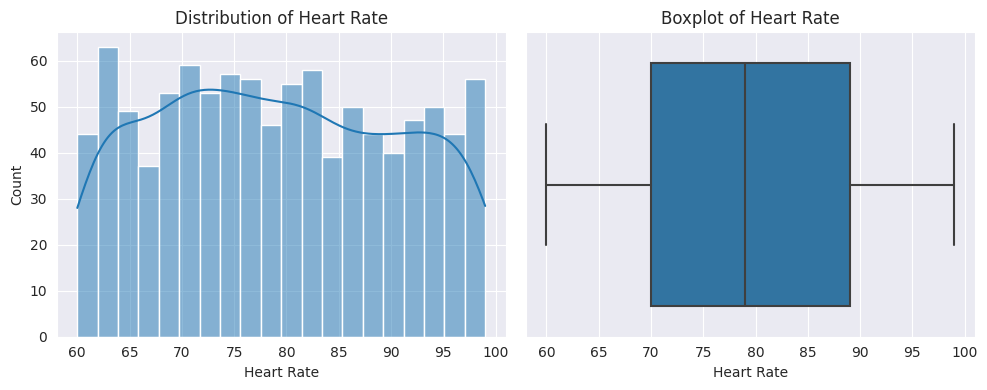

Variable: Exercise Hours
Mean: 4.529


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


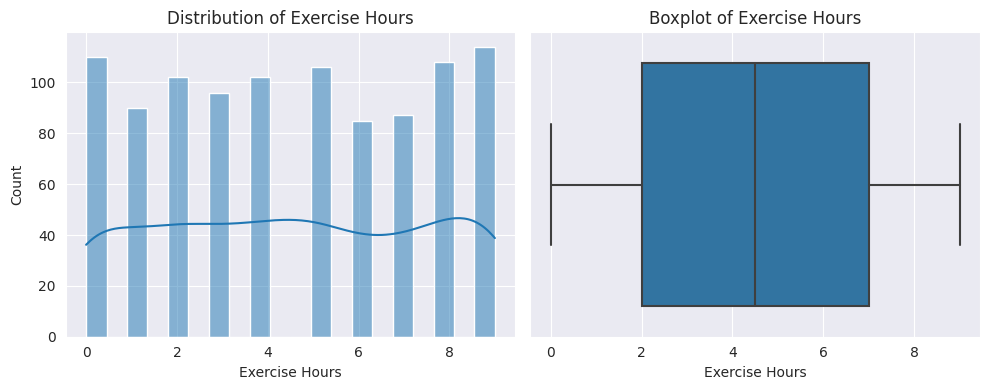

Variable: Stress Level
Mean: 5.646


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


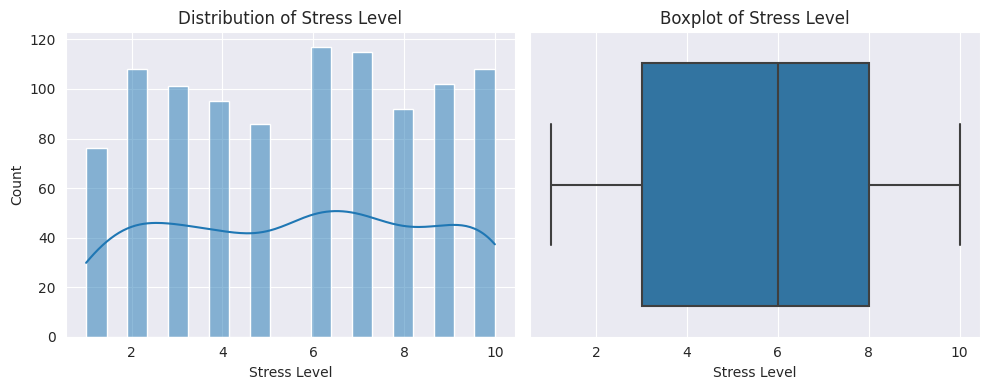

Variable: Blood Sugar
Mean: 134.941


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


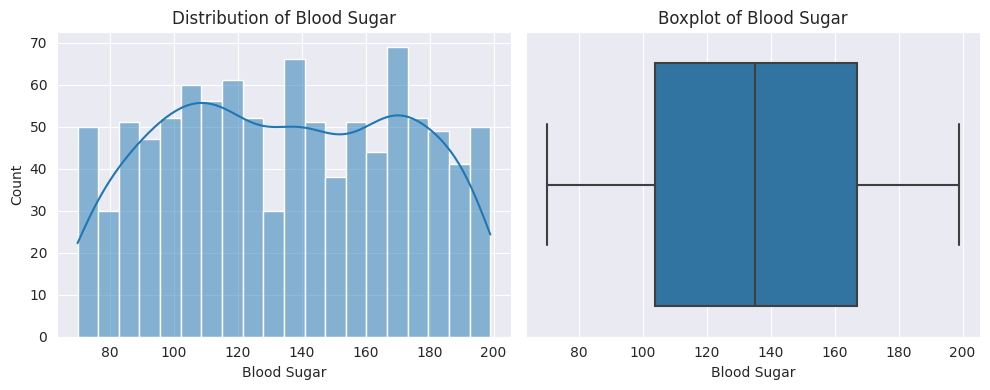

In [15]:
# we are plotting the numerical variables to obtain an idea of the dataset

numerical_vars = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']
for var in numerical_vars:
    print(f"Variable: {var}")
    print(f"Mean: {df[var].mean()}")
   
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], bins=20, kde=True)     #histogram of each variable
    plt.title(f'Distribution of {var}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])                       #boxplot showing the distribution
    plt.title(f'Boxplot of {var}')
    
    plt.tight_layout()      #prevents overlapping
    plt.show()

A noteworthy inference is that cholesterol values are above average in the dataset.

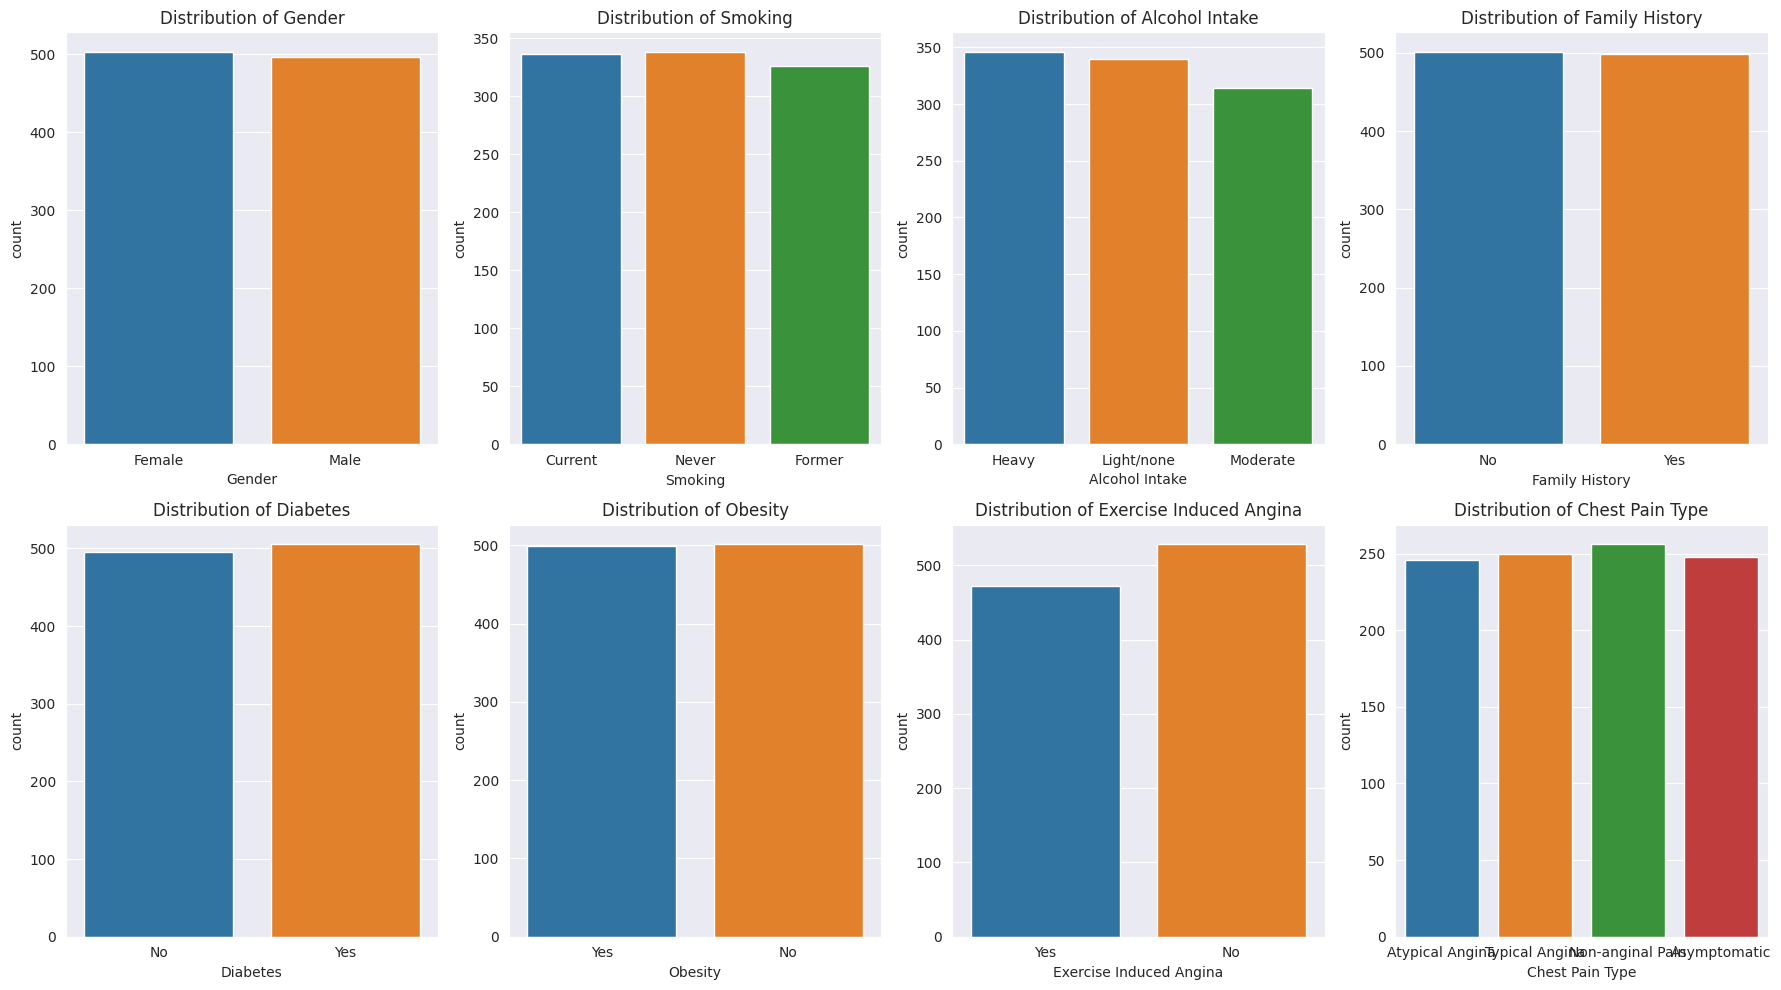

In [17]:
# let us plot the categorical values

categorical_vars = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']

n_rows = 2          #to display all plots in the same page
n_cols = 4
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 10))      #specifications of the plot
axs = axs.flatten()

for i, var in enumerate(categorical_vars):             #function for multiple plots
    ax = axs[i]
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(f'Distribution of {var}')
    
plt.tight_layout()      #prevents overlapping
plt.show()

#### Inferences from the plot:

a) Males are at a slightly greater risk of developing a heart disease as compared to females.

b) People with diabetes are at a greater risk.


## Scaling and normalizing the data

In [18]:
# Encoding binary categorical variables into numerical values for better analysis
binary_columns = ['Gender', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina']
for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [19]:
# One-hot encoding for categorical variables with more than two categories
df = pd.get_dummies(df, columns=['Smoking', 'Chest Pain Type', 'Alcohol Intake'], drop_first=True)

In [20]:
# Normalizing numerical features to make the range of the values common
numerical_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [21]:
df.head(3)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Heart Disease,Smoking_Former,Smoking_Never,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina,Alcohol Intake_Light/none,Alcohol Intake_Moderate
0,1.444534,0,-0.379005,-0.617287,-1.150139,-1.203298,0,0,1,0.831917,-0.434581,1,1,False,False,True,False,False,False,False
1,-0.273104,1,-0.793616,1.126782,-1.498561,0.160599,0,0,0,1.185323,-1.770413,1,0,False,False,False,False,True,True,False
2,0.044977,1,-0.275353,-1.678894,-1.063034,-0.521350,1,0,1,-0.228300,1.664583,1,1,False,True,True,False,False,False,False


## Correlation matrix and further readings

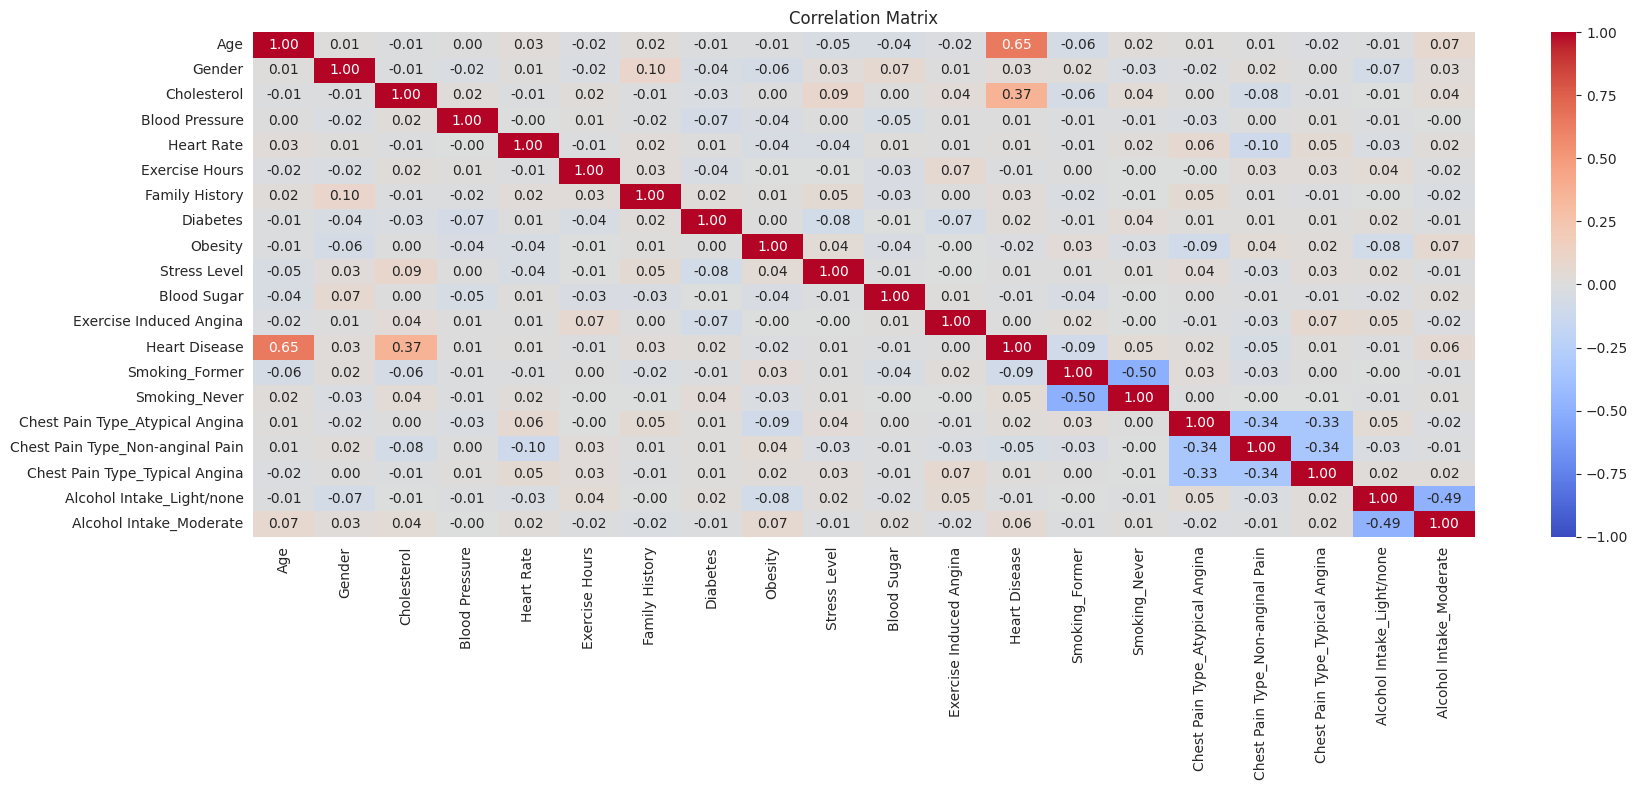

In [22]:
# creating a heatmap will help us numerically visualize the correlations among variables
plt.figure(figsize=(18, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

The factors with most positive relation to heart disease include age and cholesterol. 
If you are interested, listed below are some external resources to help understand these factors in a more detailed way.

Aging and heart disease:

a) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6616540/

b) https://memorialhermann.org/services/specialties/heart-and-vascular/healthy-living/education/heart-disease-and-age

Cholesterol and heart disease:

a) https://www.healthline.com/health/cholesterol-and-heart-disease

b) https://my.clevelandclinic.org/health/articles/11918-cholesterol-high-cholesterol-diseases

## Models

In [23]:
# Splitting the data into training and testing set

x_train,x_test,y_train,y_test = train_test_split(df.drop('Heart Disease',axis=1),df['Heart Disease'],train_size=0.8,random_state=15)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
prediction = model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.85      0.88      0.87       124
           1       0.79      0.75      0.77        76

    accuracy                           0.83       200
   macro avg       0.82      0.81      0.82       200
weighted avg       0.83      0.83      0.83       200



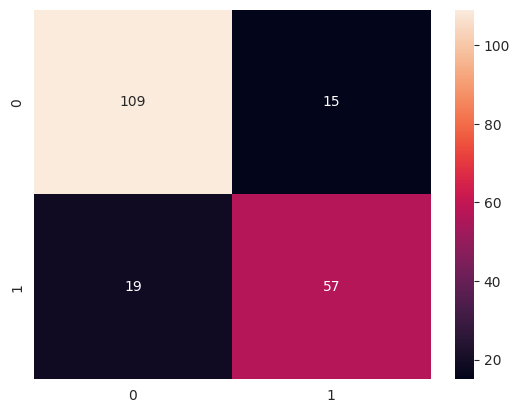

In [26]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt=".0f");

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
pred = rf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



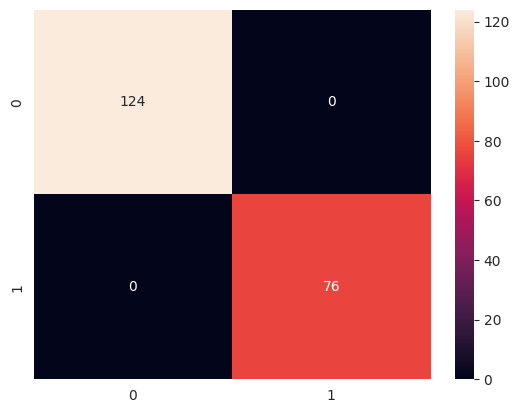

In [29]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt=".0f");

# Conclusion

We used two different models for this data set. The logistic regression model had an accuracy of 83% which although is not bad but there are options to explore better models. Trying the RandomClassifier model yielded an accuracy of 100% which proves that it is an excellent model for this dataset.

One can try using multiple models and then compare them.